In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Volcano plot for eye (mm vs hg)

# Cones

In [ ]:
# import the DGE table (condition_infected_vs_control_dge.csv)
type = 'Cones'
df = pd.read_csv(f"/data/projects/Human-retina/scripts/dif_edgeR/dif_hg_mm/{type}.csv")
df.rename(columns={'Unnamed: 0': 'gene'}, inplace=True)
df=df.dropna()

In [135]:
# Calculate -log10 of P-value
df['minusLog10FDR'] = -np.log10(df['FDR'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


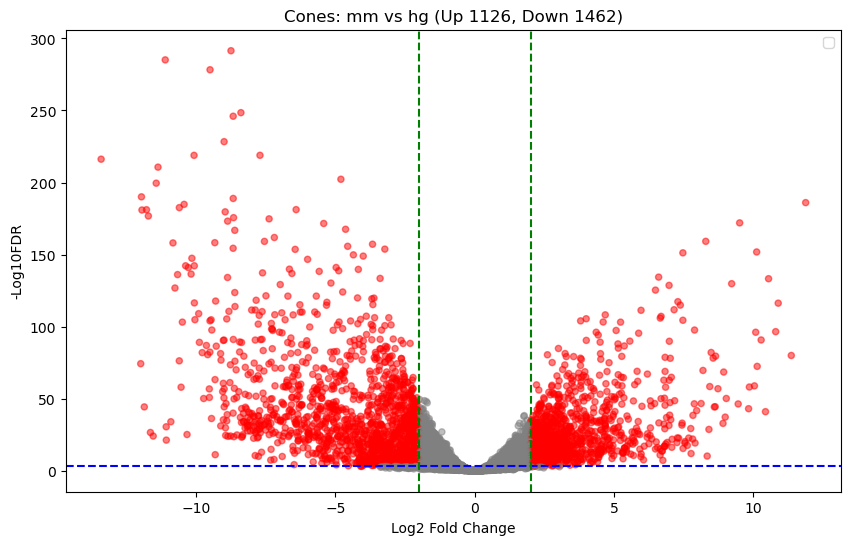

In [123]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['logFC'], df['minusLog10FDR'],
            c=np.where((df['logFC'] > -2) & (df['logFC'] < 2) | (df['minusLog10FDR'] < -np.log10(0.001)), "gray", "red"),  
            alpha=0.5,s=20)

plt.title(f'{type}: mm vs hg (Up {up_count}, Down {down_count})',)
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10FDR')



plt.axhline(y=-np.log10(0.001), color='blue', linestyle='--')  # significance threshold line
plt.axvline(x=-2, color='green', linestyle='--')  # fold change threshold lines
plt.axvline(x=2, color='green', linestyle='--')  # fold change threshold lines

plt.legend()
plt.show()
